<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

For project two, you will complete a serious of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [32]:
movies = pd.read_csv('./data/imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [33]:
# Answer: 979 rows × 6 columns
movies.shape

(979, 6)

#### Check the data type of each column.

In [34]:
# Answer:

movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

#### Calculate the average movie duration.

In [35]:
# Answer: 120.979571
movies.describe()

,star_rating,duration
count,979.000000,979.000000
mean,7.889785,120.979571
std,0.336069,26.218010
min,7.400000,64.000000
25%,7.600000,102.000000
50%,7.800000,117.000000
75%,8.100000,134.000000
max,9.300000,242.000000


#### Sort the DataFrame by duration to find the shortest and longest movies.

In [66]:
# Answer:
movies.sort_values("duration")

# To reverse, insert "ascending = False

#Shortest Movie 
movies.sort_values("duration").head(1)

#Longest Movie
movies.sort_values("duration").tail(1)

,star_rating,title,content_rating,genre,duration,actors_list
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."


#### Create a histogram of duration, choosing an "appropriate" number of bins.

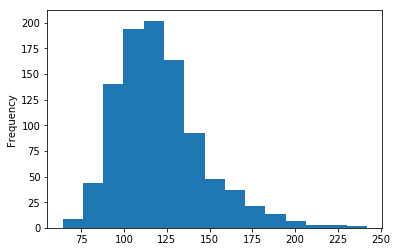

In [68]:
# Answer:

movies.duration.plot(kind="hist", bins=15)

#### Use a box plot to display that same data.

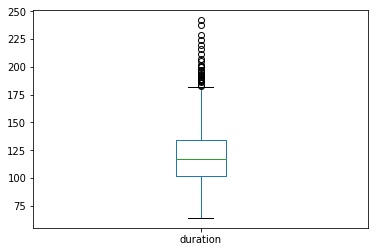

In [38]:
# Answer:

movies.duration.plot(kind="box")

## Intermediate level

#### Count how many movies have each of the content ratings.

In [39]:
# Answer: 

movies.content_rating.value_counts()

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
NC-17          7
PASSED         7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64

#### Use a visualization to display that same data, including a title and x and y labels.

Text(0,0.5,'Movie Titles')

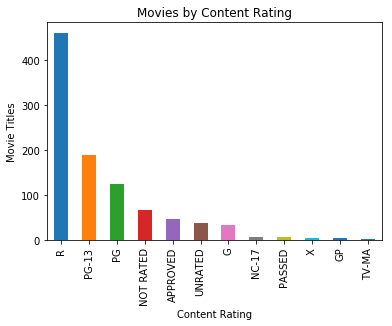

In [40]:
# Answer:
movies.content_rating.value_counts().plot(kind="bar", title="Movies by Content Rating")
plt.xlabel("Content Rating")
plt.ylabel("Movie Titles")

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [41]:
# Answer:
movies.content_rating.replace(["NOT RATED", "APPROVED","PASSED","GP"],"UNRATED", inplace=True)

movies.content_rating.value_counts()

R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17        7
X            4
TV-MA        1
Name: content_rating, dtype: int64

#### Convert the following content ratings to "NC-17": X, TV-MA.

In [42]:
# Answer:

movies.content_rating.replace(["X","TV-MA"],"NC-17", inplace = True)

movies.content_rating.value_counts()

R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17       12
Name: content_rating, dtype: int64

#### Count the number of missing values in each column.

In [43]:
# Answer:

movies.isnull().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [44]:
# Answer:

movies[movies.content_rating.isnull()]

movies.content_rating.fillna("UNRATED", inplace=True)

movies.content_rating.value_counts()

R          460
PG-13      189
UNRATED    163
PG         123
G           32
NC-17       12
Name: content_rating, dtype: int64

#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [45]:
# Answer:
movies[movies.duration >= 120].star_rating.mean()

#Movies 2 hours or longer have an average star Rating of 7.948898678414082

movies[movies.duration <120].star_rating.mean()

# Movies below 2 hours have an average star Rating of  7.838666666666657

7.838666666666657

#### Use a visualization to detect whether there is a relationship between duration and star rating.

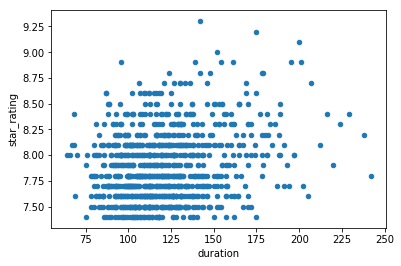

In [46]:
# Answer:

movies.plot(kind="scatter", x="duration", y="star_rating")

#The shorter the movie, the lower its star rating might be

#### Calculate the average duration for each genre.

In [47]:
# Answer:

movies.groupby("genre").duration.mean()

genre
Action       126.485294
Adventure    134.840000
Animation     96.596774
Biography    131.844156
Comedy       107.602564
Crime        122.298387
Drama        126.539568
Family       107.500000
Fantasy      112.000000
Film-Noir     97.333333
History       66.000000
Horror       102.517241
Mystery      115.625000
Sci-Fi       109.000000
Thriller     114.200000
Western      136.666667
Name: duration, dtype: float64

## Advanced level

#### Visualize the relationship between content rating and duration.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11315d390>,
      dtype=object)

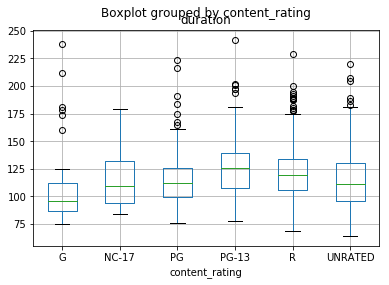

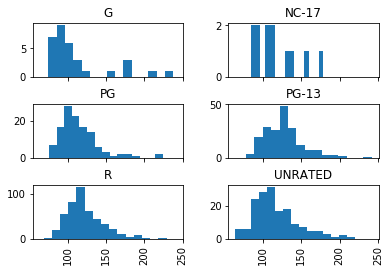

In [48]:
# Answer:

movies.boxplot(column="duration", by="content_rating")

movies.hist(column="duration", by="content_rating", bins=15, sharex=True)

#### Determine the top rated movie (by star rating) for each genre.

In [49]:
# Answer:

movies.sort_values(["genre","star_rating"],ascending=False)
movies.groupby("genre").title.first()

genre
Action                                     The Dark Knight
Adventure    The Lord of the Rings: The Return of the King
Animation                                    Spirited Away
Biography                                 Schindler's List
Comedy                                   Life Is Beautiful
Crime                             The Shawshank Redemption
Drama                                         12 Angry Men
Family                          E.T. the Extra-Terrestrial
Fantasy                          The City of Lost Children
Film-Noir                                    The Third Man
History                                Battleship Potemkin
Horror                                              Psycho
Mystery                                        Rear Window
Sci-Fi                                        Blade Runner
Thriller                                 Shadow of a Doubt
Western                     The Good, the Bad and the Ugly
Name: title, dtype: object

#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [50]:
# Answer:

movies[movies.title.duplicated()]

#482    The Girl with the Dragon Tattoo
#905                            Dracula
#924                     Les Miserables
#936                          True Grit
movies[movies.title == "The Girl with the Dragon Tattoo"] 
movies[movies.title == "Dracula"] 
movies[movies.title == "Les Miserables"]
movies[movies.title == "True Grit"]



,star_rating,title,content_rating,genre,duration,actors_list
662,7.7,True Grit,PG-13,Adventure,110,"[u'Jeff Bridges', u'Matt Damon', u'Hailee Stei..."
936,7.4,True Grit,UNRATED,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


#### Option 1: manually create a list of relevant genres, then filter using that list

In [51]:
# Answer:

genre_count = movies.genre.value_counts()

print (genre_count)
print("\n")

genre_drama = movies[movies.genre == "Drama"].star_rating.mean()
genre_comedy = movies[movies.genre == "Comdey"].star_rating.mean()
genre_action = movies[movies.genre == "Action"].star_rating.mean()
genre_Biography = movies[movies.genre == "Biography"].star_rating.mean()
genre_Adventure = movies[movies.genre == "Adventure"].star_rating.mean()
genre_Animation = movies[movies.genre == "Animation"].star_rating.mean()
genre_Horror = movies[movies.genre == "Horror"].star_rating.mean()
genre_Mystery = movies[movies.genre == "Mystery"].star_rating.mean()



Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Adventure     75
Animation     62
Horror        29
Mystery       16
Western        9
Thriller       5
Sci-Fi         5
Film-Noir      3
Family         2
Fantasy        1
History        1
Name: genre, dtype: int64




#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [52]:
# Answer:

genre_counts = movies.genre.value_counts()

top_genre = genre_counts[genre_counts >=10].index

print(top_genre)

movies[movies.genre.isin(top_genre)].groupby("genre").star_rating.mean()

Index(['Drama', 'Comedy', 'Action', 'Crime', 'Biography', 'Adventure',
       'Animation', 'Horror', 'Mystery'],
      dtype='object')


genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [53]:
# Answer:
movies.groupby("genre").star_rating.mean()[movies.genre.value_counts() >= 10]



genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 4: aggregate by count and mean, then filter using the count

In [54]:
# Answer:

genre_rating = movies.groupby("genre").star_rating.agg(["count", "mean"])

genre_rating[genre_rating["count"]>=10]

,count,mean
genre,,
Action,136,7.884559
Adventure,75,7.933333
Animation,62,7.914516
Biography,77,7.862338
Comedy,156,7.822436
Crime,124,7.916935
Drama,278,7.902518
Horror,29,7.806897
Mystery,16,7.975000


## Bonus

#### Figure out something "interesting" using the actors data!

In [61]:
movies.actors_list.value_counts()

#There are 6 Harry Potter films and 3 star wars movies in the list! 

[u'Daniel Radcliffe', u'Emma Watson', u'Rupert Grint']               6
[u'Mark Hamill', u'Harrison Ford', u'Carrie Fisher']                 3
[u'Ian McKellen', u'Martin Freeman', u'Richard Armitage']            2
[u'Tom Hanks', u'Tim Allen', u'Joan Cusack']                         2
[u'Michael J. Fox', u'Christopher Lloyd', u'Lea Thompson']           2
[u'Emma Thompson', u'Tom Hanks', u'Annie Rose Buckley']              1
[u'Ray Winstone', u'Guy Pearce', u'Emily Watson']                    1
[u'Simon Pegg', u'Nick Frost', u'Martin Freeman']                    1
[u'Mich\xe8le Caucheteux', u'Jean-Claude Donda', u'Michel Robin']    1
[u'Cary Grant', u'Eva Marie Saint', u'James Mason']                  1
[u'Kirk Douglas', u'Ralph Meeker', u'Adolphe Menjou']                1
[u'Christian Bale', u'Justin Theroux', u'Josh Lucas']                1
[u'Patrick Stewart', u'Hugh Jackman', u'Halle Berry']                1
[u'Griffin Dunne', u'Rosanna Arquette', u'Verna Bloom']              1
[u'Chi